# Problem Statement:

A Micro-finance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. 

The Micro-finance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many micro-finance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering micro-finance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.

Today, micro-finance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.


# Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


## Imported the libraries 

In [1]:
## imported the libraries 

# data processing
import pandas as pd 
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier






In [2]:
## read the data for the drive 
## we check the we have CSV file so we will useing the pandas(read_CSV)

df_MCD = pd.read_csv(r"C:/Users/HP/Desktop/Intership/Data file.csv")
df_MCD.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
### Lets chect the top 5 and bottom 5 rows data in on set 

df_MCD

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
# let's check how row and colums in the date set 

df_MCD.shape


(209593, 37)

In [5]:
## we read the data success fully now we cheked the basics info of the dataset 

df_MCD.info()

## here we can check that we have 37-columns & 209592 row 
## we have float64(21), int64(13), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# lets check the basic summary of dataset 

df_MCD.describe(include='all')

## As we check that the negative value present in the dataset 


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [7]:
df_MCD.min() ## to check the negative in the data set

Unnamed: 0                        1
label                             0
msisdn                  00004I82738
aon                             -48
daily_decr30               -93.0127
daily_decr90               -93.0127
rental30                   -23737.1
rental90                   -24720.6
last_rech_date_ma               -29
last_rech_date_da               -29
last_rech_amt_ma                  0
cnt_ma_rech30                     0
fr_ma_rech30                      0
sumamnt_ma_rech30                 0
medianamnt_ma_rech30              0
medianmarechprebal30           -200
cnt_ma_rech90                     0
fr_ma_rech90                      0
sumamnt_ma_rech90                 0
medianamnt_ma_rech90              0
medianmarechprebal90           -200
cnt_da_rech30                     0
fr_da_rech30                      0
cnt_da_rech90                     0
fr_da_rech90                      0
cnt_loans30                       0
amnt_loans30                      0
maxamnt_loans30             

In [8]:
## change the datatype of the attribute in object 

df_MCD[['aon',"daily_decr30",'daily_decr90']] = df_MCD[['aon',"daily_decr30",'daily_decr90']].astype(int)
df_MCD[['rental30',"rental90",'last_rech_date_ma']] = df_MCD[['rental30',"rental90",'last_rech_date_ma']].astype(int)
df_MCD[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']] = df_MCD[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']].astype(int)

In [9]:
## remove the (-)tive sign in the below attributes



df_MCD[['aon',"daily_decr30",'daily_decr90']] = df_MCD[['aon',"daily_decr30",'daily_decr90']].abs()
df_MCD[['rental30',"rental90",'last_rech_date_ma']] = df_MCD[['rental30',"rental90",'last_rech_date_ma']].abs()
df_MCD[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']] = df_MCD[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']].abs()


In [10]:
### check that negative value remove or not 
df_MCD.min()

Unnamed: 0                        1
label                             0
msisdn                  00004I82738
aon                               1
daily_decr30                      0
daily_decr90                      0
rental30                          0
rental90                          0
last_rech_date_ma                 0
last_rech_date_da                 0
last_rech_amt_ma                  0
cnt_ma_rech30                     0
fr_ma_rech30                      0
sumamnt_ma_rech30                 0
medianamnt_ma_rech30              0
medianmarechprebal30              0
cnt_ma_rech90                     0
fr_ma_rech90                      0
sumamnt_ma_rech90                 0
medianamnt_ma_rech90              0
medianmarechprebal90              0
cnt_da_rech30                     0
fr_da_rech30                      0
cnt_da_rech90                     0
fr_da_rech90                      0
cnt_loans30                       0
amnt_loans30                      0
maxamnt_loans30             

In [11]:
df_MCD.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.803705,5381.072741,6082.120491,2714.932860,3509.052535,3756.123387,3712.202230,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75695.983713,9220.672768,10918.781064,4294.228475,5754.601179,53905.838843,53374.797717,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.000000,42.000000,299.000000,330.000000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.000000,1500.000000,1095.000000,1347.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.000000,3362.000000,4204.000000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.000000,265926.000000,320630.000000,198926.000000,200148.000000,998650.000000,999171.000000,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [12]:
### check the unique value of the data set 

df_MCD.apply(lambda x : len (x.unique()))

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4494
daily_decr30             28993
daily_decr90             31797
rental30                 17511
rental90                 21477
last_rech_date_ma         1154
last_rech_date_da         1161
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30      3163
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90      2080
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [13]:
### convert the data type of few columns  


df_MCD[["last_rech_date_ma","last_rech_date_da","fr_ma_rech30"]]= df_MCD[["last_rech_date_ma","last_rech_date_da","fr_ma_rech30"]].astype(int)
df_MCD[["payback90","payback30","cnt_loans90"]]=df_MCD[["payback90","payback30","cnt_loans90"]].astype(int)
df_MCD[["cnt_da_rech30","fr_da_rech30","medianmarechprebal90","medianamnt_ma_rech90"]]=df_MCD[["cnt_da_rech30","fr_da_rech30","medianmarechprebal90","medianamnt_ma_rech90"]].astype(int)


In [14]:
# let's check the total column present in the date set 

df_MCD.columns.values 


array(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30',
       'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'pcircle', 'pdate'], dtype=object)

## check the missing value :- 

In [15]:
total = df_MCD.isnull().sum().sort_values(ascending=False)

percent_1 = df_MCD.isnull().sum()/df_MCD.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data

## Here we can check that no missing values present in the dataset 


,Total,%
pdate,0,0.0
fr_ma_rech90,0,0.0
medianmarechprebal30,0,0.0
medianamnt_ma_rech30,0,0.0
sumamnt_ma_rech30,0,0.0
fr_ma_rech30,0,0.0
cnt_ma_rech30,0,0.0
last_rech_amt_ma,0,0.0
last_rech_date_da,0,0.0
last_rech_date_ma,0,0.0


In [16]:
df_MCD[["pdate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   pdate   209593 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [17]:
## ## Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type
## and add new columne 


df_MCD['pdate']=pd.to_datetime(df_MCD['pdate'])

df_MCD['Year']=df_MCD['pdate'].apply(lambda x:x.year)
df_MCD['Month']=df_MCD['pdate'].apply(lambda x:x.month)
df_MCD['Day']=df_MCD['pdate'].apply(lambda x:x.day)
##df_MCD['Weekend']=df_MCD['pdate'].apply(lambda x:x.weekend)



In [18]:
## lets check the changes 

df_MCD.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,1,0,21408I70789,272,3055,3065,220,260,2,0,...,12,6,0.0,29,29,UPW,2016-07-20,2016,7,20
1,2,1,76462I70374,712,12122,12124,3691,3691,20,0,...,12,12,0.0,0,0,UPW,2016-08-10,2016,8,10
2,3,1,17943I70372,535,1398,1398,900,900,3,0,...,6,6,0.0,0,0,UPW,2016-08-19,2016,8,19
3,4,1,55773I70781,241,21,21,159,159,41,0,...,12,6,0.0,0,0,UPW,2016-06-06,2016,6,6
4,5,1,03813I82730,947,150,150,1098,1098,4,0,...,42,6,0.0,2,2,UPW,2016-06-22,2016,6,22


In [19]:
df_MCD.describe()

## here check that negative value present in the data set 
## we have to remove all the negative sign present in the data set 


,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,104797.000000,0.875177,8112.803705,5381.072741,6082.120491,2714.932860,3509.052535,3756.123387,3712.202230,2064.452797,...,0.054029,18.518452,23.645398,6.703134,0.046077,3.232226,4.126517,2016.0,6.797321,14.39894
std,60504.431823,0.330519,75695.983713,9220.672768,10918.781064,4294.228475,5754.601179,53905.838843,53374.797717,2370.786034,...,0.218039,224.764898,26.469861,2.103864,0.200692,8.762775,10.256986,0.0,0.741435,8.43890
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,52399.000000,1.000000,246.000000,42.000000,42.000000,299.000000,330.000000,1.000000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,104797.000000,1.000000,527.000000,1469.000000,1500.000000,1095.000000,1347.000000,3.000000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.000000,2016.0,7.000000,14.00000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.000000,3362.000000,4204.000000,7.000000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.000000,4.000000,2016.0,7.000000,21.00000
max,209593.000000,1.000000,999860.000000,265926.000000,320630.000000,198926.000000,200148.000000,998650.000000,999171.000000,55000.000000,...,3.000000,4997.000000,438.000000,12.000000,3.000000,171.000000,171.000000,2016.0,8.000000,31.00000


In [20]:
"""
# lets check the correlation by heatmap
cor=df_MCD.corr()
top_corr_feature=cor.index
plt.figure(figsize=(25,20))
sns.heatmap(df_MCD[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()"""

'\n# lets check the correlation by heatmap\ncor=df_MCD.corr()\ntop_corr_feature=cor.index\nplt.figure(figsize=(25,20))\nsns.heatmap(df_MCD[top_corr_feature].corr(),annot=True,cmap="RdYlGn")\nplt.title("HEATMAP")\nplt.show()'

In [21]:
corr_matrix = df_MCD.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168291
daily_decr90            0.166142
Month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120854
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.076030
rental30                0.058640
medianamnt_loans30      0.044589
payback90               0.044201
payback30               0.043311
medianmarechprebal90    0.037015
medianamnt_loans90      0.035747
Day                     0.006825
cnt_loans90             0.004734
cnt_da_rech30           0.003827
last_rech_date_ma       0.003730
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0

In [22]:
#### Droped the data unused colomns in the data set 
df_MCD.drop(['Unnamed: 0', 'msisdn','pdate', 'pcircle'],axis= 1, inplace= True) 


In [23]:
df_MCD.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,0,272,3055,3065,220,260,2,0,1539,2,...,0.0,2,12,6,0.0,29,29,2016,7,20
1,1,712,12122,12124,3691,3691,20,0,5787,1,...,0.0,1,12,12,0.0,0,0,2016,8,10
2,1,535,1398,1398,900,900,3,0,1539,1,...,0.0,1,6,6,0.0,0,0,2016,8,19
3,1,241,21,21,159,159,41,0,947,0,...,0.0,2,12,6,0.0,0,0,2016,6,6
4,1,947,150,150,1098,1098,4,0,2309,7,...,0.0,7,42,6,0.0,2,2,2016,6,22


In [24]:
### Discover outliers with mathematical function
## using the Z-sore 
from scipy.stats import zscore
z = abs(zscore(df_MCD))
print(df_MCD.shape)
df_final = df_MCD.loc[(z<3).all(axis = 1)]
print(df_final.shape)

(209593, 36)
(0, 36)


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [25]:
"""
# # For plotting histogram
import matplotlib.pyplot as plt
df_MCD.hist(bins=50, figsize=(20, 20))"""

'\n# # For plotting histogram\nimport matplotlib.pyplot as plt\ndf_MCD.hist(bins=50, figsize=(20, 20))'

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>],
       [<AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'mediana

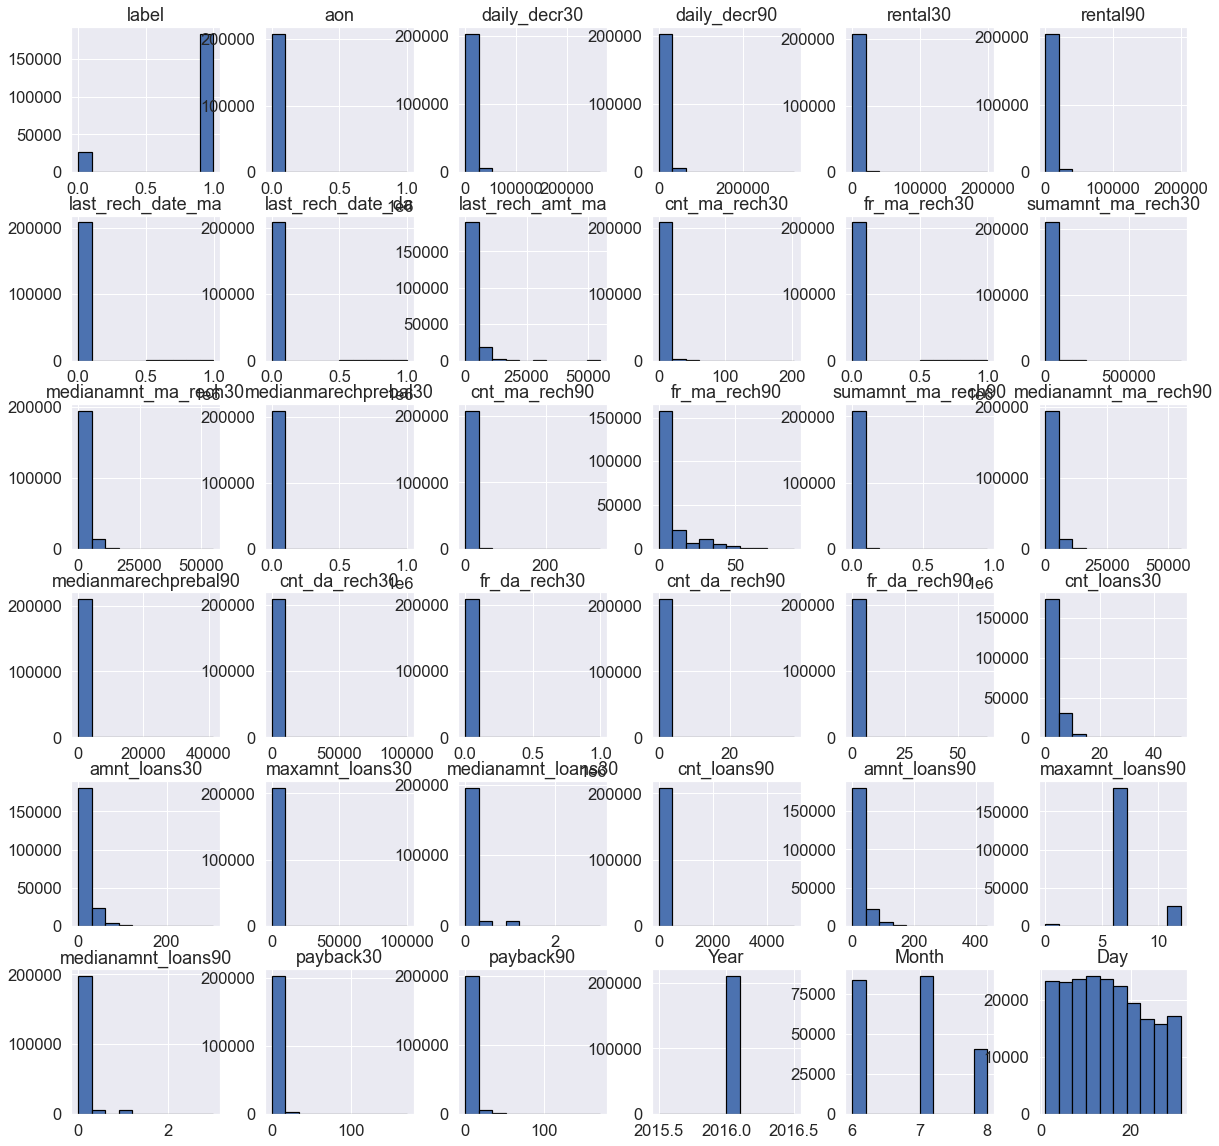

In [26]:
sns.set(font_scale=1.5)
df_MCD.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))


In [27]:
df_MCD['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amnt_loans30'>

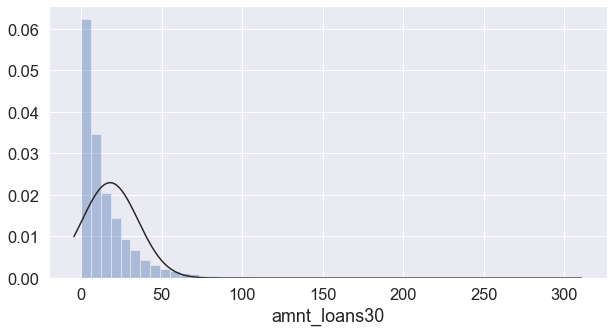

In [28]:

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df_MCD.amnt_loans30 , kde=False, fit=norm)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

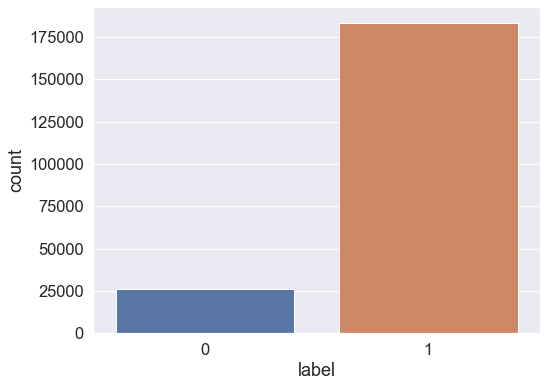

In [29]:
## Bar Chart to indicate the label
plt.figure(figsize=[8,6])
sns.countplot(x = 'label' , data = df_MCD)
plt.xticks(rotation = 0)

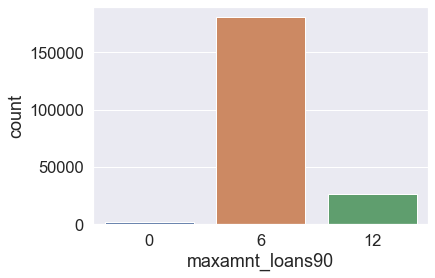

In [30]:
ax=sns.countplot(x="maxamnt_loans90",data=df_MCD)

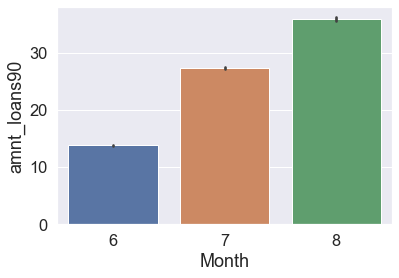

In [31]:

 sd = sns.barplot(y="amnt_loans90", x="Month", data=df_MCD)
    
## here we can check that 

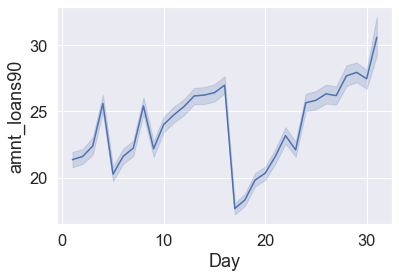

In [32]:
## lest check that relation between Month and amnt_loans90

sns.lineplot(x=df_MCD["Day"] , y=df_MCD["amnt_loans90"], data= df_MCD)
plt.show()

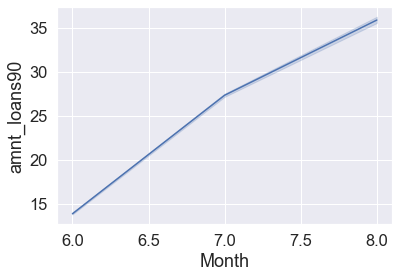

In [33]:
## lest check that relation between Month and amnt_loans90

sns.lineplot(x=df_MCD["Month"] , y=df_MCD["amnt_loans90"], data= df_MCD)
plt.show()

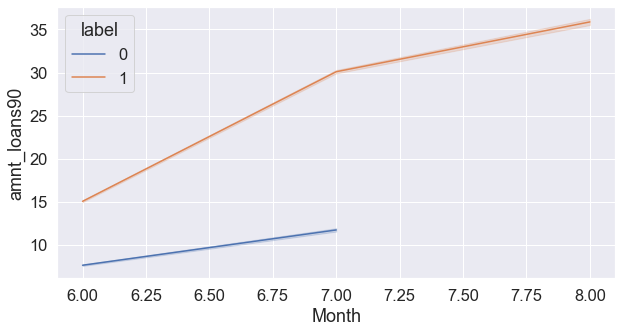

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="amnt_loans90", hue='label', data=df_MCD)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


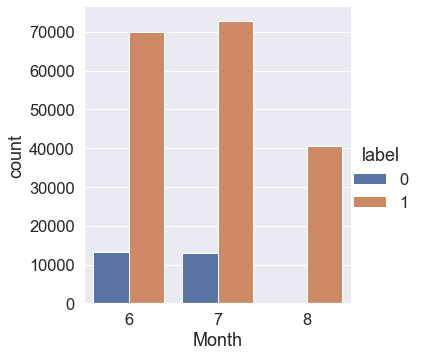

In [35]:
sns.factorplot('Month', data=df_MCD, hue='label', kind='count')

In [36]:
categorical_values = []
for column in df_MCD.columns:
    print('======================================================')
    print(f"{column} : {df_MCD[column].unique()}")
    if len(df_MCD[column].unique()) <= 10:
        categorical_values.append(column)

label : [0 1]
aon : [   272    712    535 ... 803380 581435 811881]
daily_decr30 : [ 3055 12122  1398 ... 16330 30900 28785]
daily_decr90 : [ 3065 12124  1398 ... 45485 24825 45515]
rental30 : [  220  3691   900 ... 19887 13817 19706]
rental90 : [  260  3691   900 ...  8865 24240 12318]
last_rech_date_ma : [     2     20      3 ... 767980 611678 590843]
last_rech_date_da : [     0     55     63 ... 809043 799233 636529]
last_rech_amt_ma : [ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  1933 17391 11927  6960 21739  1554
 11327  4940 12500   790  5214 32000 11900  9400 11000  1580  4340  3466
 55000   769 11004   946  4066 19130 17467  4047   954 14783  6222   177
 19913  1546  1923 22609  7999  1538 15652   772 34783 10454]
cnt_ma_rech30 : [  2   1   0   7   4   3   5  15   6   9  10  11  13   8  12  16  18  19
  29  17  14  21  27  22  37  23  20  26 

limit_output extension: Maximum message size of 10000 exceeded with 10934 characters

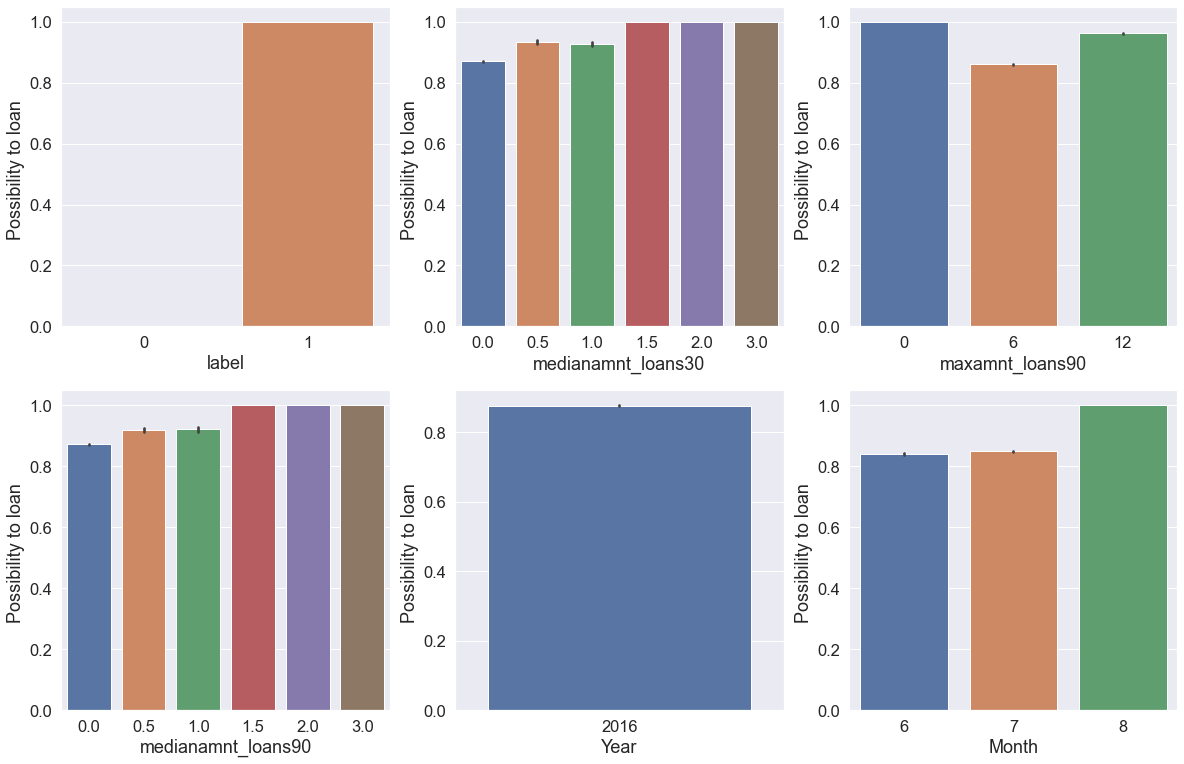

In [37]:

plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='label', data=df_MCD)
    plt.ylabel('Possibility to loan ')
    plt.xlabel(f'{column}')

In [38]:
#lets chcek skewnesss of the dataset

df_MCD.skew(axis = 0, skipna = True)

label                   -2.270254
aon                     10.392952
daily_decr30             3.946202
daily_decr90             4.252586
rental30                 4.560582
rental90                 4.467332
last_rech_date_ma       14.790975
last_rech_date_da       14.814858
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772834
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752764
medianmarechprebal90    45.089668
cnt_da_rech30           17.818410
fr_da_rech30            14.776431
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.595040
amnt_loans90             3.150006
maxamnt_loans9

In [39]:
### remove the skewness of the data set

import numpy as np
for col in df_MCD.columns:
    if df_MCD.skew().loc[col]>0.55:
        df_MCD[col]=np.log1p(df_MCD[col])

In [40]:
df_MCD.skew(axis = 0, skipna = True)

label                   -2.270254
aon                      2.083817
daily_decr30            -0.458032
daily_decr90            -0.434081
rental30                -1.235694
rental90                -1.177703
last_rech_date_ma        4.334957
last_rech_date_da        9.849224
last_rech_amt_ma        -2.190580
cnt_ma_rech30           -0.002013
fr_ma_rech30             4.071762
sumamnt_ma_rech30       -1.762898
medianamnt_ma_rech30    -1.867802
medianmarechprebal30     0.259129
cnt_ma_rech90           -0.033410
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -2.023724
medianamnt_ma_rech90    -2.235316
medianmarechprebal90    -0.572732
cnt_da_rech30           13.709138
fr_da_rech30            13.840685
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
cnt_loans30              0.720970
amnt_loans30            -0.026725
maxamnt_loans30          9.512099
medianamnt_loans30       3.995359
cnt_loans90              3.191295
amnt_loans90             0.241660
maxamnt_loans9

In [41]:
#Now let seprate input and output variable to be used for the linear regression problem
X = df_MCD.drop(labels=['label'], axis=1)
y = df_MCD['label']
X.head()



,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,5.609472,8.024862,8.028129,5.398163,5.564520,1.098612,0.0,7.339538,1.098612,3.091042,...,0.0,1.098612,2.564949,1.945910,0.0,3.401197,3.401197,2016,7,20
1,6.569481,9.402860,9.403025,8.213924,8.213924,3.044522,0.0,8.663542,0.693147,0.000000,...,0.0,0.693147,2.564949,2.564949,0.0,0.000000,0.000000,2016,8,10
2,6.284134,7.243513,7.243513,6.803505,6.803505,1.386294,0.0,7.339538,0.693147,0.000000,...,0.0,0.693147,1.945910,1.945910,0.0,0.000000,0.000000,2016,8,19
3,5.488938,3.091042,3.091042,5.075174,5.075174,3.737670,0.0,6.854355,0.000000,0.000000,...,0.0,1.098612,2.564949,1.945910,0.0,0.000000,0.000000,2016,6,6
4,6.854355,5.017280,5.017280,7.002156,7.002156,1.609438,0.0,7.745003,2.079442,1.098612,...,0.0,2.079442,3.761200,1.945910,0.0,1.098612,1.098612,2016,6,22


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [43]:
"""
## #scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() ###Perform standardization by centering and scaling
X = sc.fit_transform(X)
X"""

'\n## #scaling down using standardscaler\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler() ###Perform standardization by centering and scaling\nX = sc.fit_transform(X)\nX'

KNN score: 0.8845779499608771

KNN score: 0.8625164602377908

KNN score: 0.9044447413118571

KNN score: 0.8993301398881658

KNN score: 0.9105898967537548

KNN score: 0.907517319032806

KNN score: 0.9123074867840989

KNN score: 0.9106471497547663

KNN score: 0.9135670528063513

KNN score: 0.9127655107921907

KNN score: 0.9135861371400218

KNN score: 0.9131090287982595

KNN score: 0.9148457031622741

KNN score: 0.9147502814939217

KNN score: 0.9156663295101052

KNN score: 0.9153800645050478

KNN score: 0.9154945705070707

KNN score: 0.9155709078417527

KNN score: 0.9161243535181969

KNN score: 0.9159525945151625

KNN score: 0.9161434378518674

KNN score: 0.9161816065192084

KNN score: 0.9161434378518674

KNN score: 0.9156472451764347



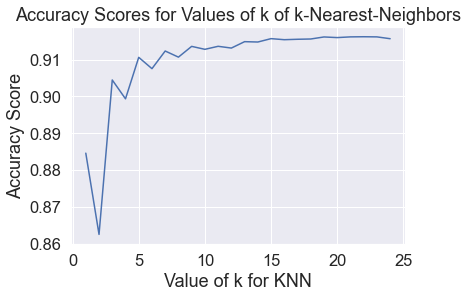

In [44]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

all_accuracies = []


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # Choose classifier
    KNN_fit = knn.fit(X_train_scaled, y_train) # Train classifier
    accuracy = KNN_fit.score(X_test_scaled, y_test) # Estimate the accuracy of the classifier on future data
    print ('KNN score: {}\n'.format(accuracy))
    scores.append(accuracy)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

all_accuracies.append(max(scores))

In [ ]:
from sklearn.svm import SVC

# For unnormalized data
SVM1_RBF_UnNorm = SVC(C=10).fit(X_train, y_train)
SVM1_Sig_UnNorm = SVC(C=10, kernel="sigmoid").fit(X_train, y_train)

# For normalized data
SVM1_RBF_Norm = SVC(C=10).fit(X_train_scaled, y_train)
SVM1_Sig_Norm = SVC(C=10, kernel="sigmoid").fit(X_train_scaled, y_train)

print('Accuracy of SVM on unnormalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on unnormalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_Norm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_Norm.score(X_test_scaled, y_test)))

all_accuracies.append(SVM1_RBF_Norm.score(X_test_scaled, y_test))

In [ ]:
##  let's try with a Decision Tree algorithm:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

DTC = DecisionTreeClassifier(max_depth=None).fit(X_train_scaled, y_train)
y_predicted = DTC.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predicted)
print("Classification with Decision Tree Algorithm\nConfusion Matrix\n\n",conf_mat)
print('\nAccuracy:{0:.3f}\n'.format(accuracy_score(y_test, y_predicted)))
print('Classification Report: \n\n',classification_report(y_test, y_predicted))

all_accuracies.append(accuracy_score(y_test, y_predicted))

In [ ]:
import lightgbm as lg

lg = lg.LGBMClassifier()
lg.fit(X_train_scaled,y_train)
predictions = lg.predict(X_test_scaled)
lg_acc = (predictions == y_test).sum().astype(float)/len(predictions)
print("Accuracy of LightGBM Classifier: ",lg_acc)

all_accuracies.append(lg_acc)

In [ ]:
horizontal = ['KNN','Decision Tree','SVM','LightGBM']
plt.ylim(0.8,1.0)
plt.bar(horizontal, all_accuracies, align='center', alpha=0.5)